<a href="https://colab.research.google.com/github/Pedrobvivas/AnaliseDados/blob/main/VideoGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

caminho_arquivo = "video_games.csv"
dados = pd.read_csv(caminho_arquivo)

dados.columns = ["Nome","Plataforma","Ano Fabricado", "Genêro", "Vendas Globais", "Pontuação User", "Contador do User"]
dados.head()

,Nome,Plataforma,Ano Fabricado,Genêro,Vendas Globais,Pontuação User,Contador do User
0,Doom,PC,1992,Shooter,0.03,8.2,1796
1,Battle Arena Toshinden,PS,1994,Fighting,1.27,6.3,4
2,Resident Evil,PS,1996,Action,5.05,9.0,266
3,PaRappa The Rapper,PS,1996,Misc,1.92,7.4,48
4,Tomb Raider,PC,1996,Action,1.03,8.5,3552


Total de jogos: 4648


<ipython-input-8-0b941e35dd22>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='Plataforma', palette = 'muted', order=dados['Plataforma'].value_counts().index)


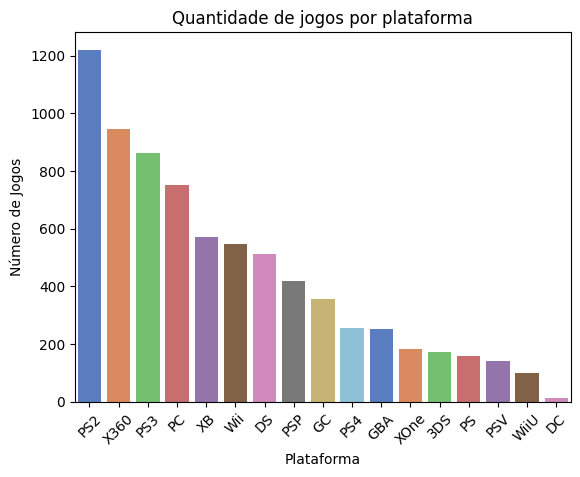

In [8]:
contagem_jogos = dados["Nome"].nunique()
print("Total de jogos:", contagem_jogos)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dados, x='Plataforma', palette = 'muted', order=dados['Plataforma'].value_counts().index)

plt.title('Quantidade de jogos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()


In [9]:
import pandas as pd

contagem_generos = dados['Genêro'].value_counts()
contagem_generos_df = contagem_generos.reset_index()
contagem_generos_df.columns = ['Gênero', 'Quantidade']

media_por_genero = dados.groupby('Genêro')['Pontuação User'].mean().reset_index()
media_por_genero.columns = ['Gênero', 'Média Pontuação']

resultado_df = pd.merge(contagem_generos_df, media_por_genero, on='Gênero')

media_geral = dados['Pontuação User'].mean()
print("Média das notas dos jogos é:", media_geral.round(2))

print("Sendo cada um deles: ")
for _, row in resultado_df.iterrows():
    print(f"{row['Gênero']} -> {row['Quantidade']} jogos, Média das notas: {row['Média Pontuação']:.2f}")


Média das notas dos jogos é: 7.13
Sendo cada um deles: 
Action -> 1796 jogos, Média das notas: 7.06
Sports -> 1081 jogos, Média das notas: 6.95
Shooter -> 905 jogos, Média das notas: 7.05
Role-Playing -> 737 jogos, Média das notas: 7.62
Racing -> 629 jogos, Média das notas: 7.04
Misc -> 429 jogos, Média das notas: 6.81
Platform -> 424 jogos, Média das notas: 7.31
Fighting -> 395 jogos, Média das notas: 7.30
Simulation -> 337 jogos, Média das notas: 7.15
Strategy -> 305 jogos, Média das notas: 7.29
Adventure -> 298 jogos, Média das notas: 7.14
Puzzle -> 125 jogos, Média das notas: 7.14


<ipython-input-47-65eaa1b0721c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='Genêro', palette = 'pastel', order=dados['Genêro'].value_counts().index)


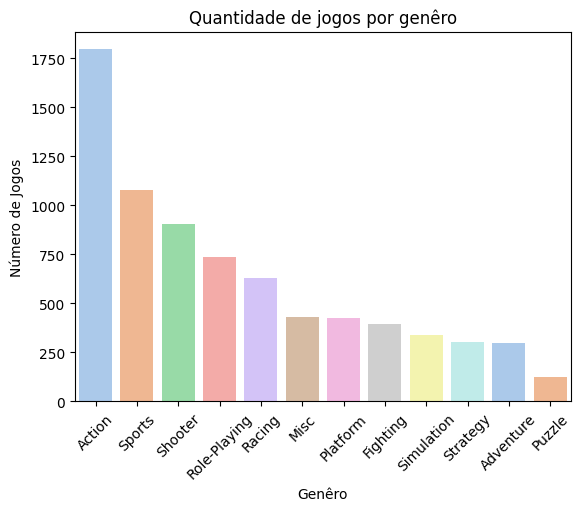

In [47]:
contagem_generos = dados['Genêro'].value_counts()
sns.countplot(data=dados, x='Genêro', palette = 'pastel', order=dados['Genêro'].value_counts().index)
plt.title('Quantidade de jogos por genêro')
plt.xlabel('Genêro')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()

In [20]:
menor_data = dados['Ano Fabricado'].min()
maior_data = dados['Ano Fabricado'].max()

print("O jogo mais recente é do ano", maior_data,"e o menor",menor_data)
quantidade_menor_data = dados['Ano Fabricado'].value_counts().min()
quantidade_maior_data = dados['Ano Fabricado'].value_counts().max()
print("Sendo o mais recente a quantidade de", quantidade_maior_data,"e do mais antigo",quantidade_menor_data)

O jogo mais recente é do ano 2016 e o menor 1992
Sendo o mais recente a quantidade de 661 e do mais antigo 1


In [41]:
melhor_pontuacao = dados['Pontuação User'].max()
jogos_melhores_pontuacoes = dados[dados['Pontuação User'] == melhor_pontuacao]['Nome']

lista_melhores_jogos = jogos_melhores_pontuacoes.tolist()

if len(lista_melhores_jogos)==1:
    print(f"O melhor jogo é: {lista_melhores_jogos[0]}, com a pontuação de:{melhor_pontuacao}")
else:
    jogos_str = ', '.join(lista_melhores_jogos)
    print(f"Os jogos com a maior pontuação ({melhor_pontuacao}) são: {jogos_str}.")

pior_pontuacao = dados['Pontuação User'].min()
jogos_piores_pontuacoes = dados[dados['Pontuação User'] == pior_pontuacao]['Nome']

lista_piores_jogos = jogos_piores_pontuacoes.tolist()

if len(lista_piores_jogos)==1:
    print(f"O pior jogo é: {lista_piores_jogos[0]}, com a pontuação de: {pior_pontuacao}")
else:
    jogos_str = ', '.join(lista_piores_jogos)
    print(f"Os jogos com a pior pontuação ({pior_pontuacao}) são: {jogos_str}.")

O melhor jogo é: Breath of Fire III, com a pontuação de:9.7
O pior jogo é: My Little Pony: Pinkie Pie's Party, com a pontuação de: 0.0
